<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/08_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'><b><h3>PCA</h3></b></font>

*Principal Component Analysis*

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
# SVD
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
W2 = Vt.T[:, :2]
X2D_svd = X_centered.dot(W2)

In [ ]:
X2D_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [ ]:
# PCA using Scikit-Learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [ ]:
# Preserve 95% of training set's variance
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

In [ ]:
# Can set n_components=d and run PCA again. However,
# the better option is set n_components to a float 
# between 0.0 and 1.0 to indicate the ratio 
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

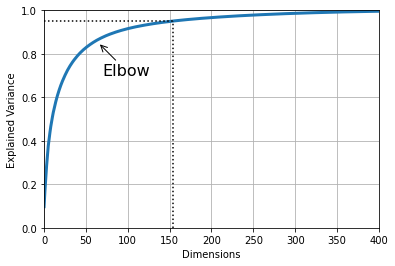

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0 ,1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0,95, 'ko')
plt.annotate('Elbow', xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle='->'), fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recoverd = pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X_train, X_recoverd)

218.72652014057726

**Incremental PCA**

It is useful for large training sets (not fit in memory) and for applying PCA online

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(X_train)

In [ ]:
mean_squared_error(X_reduced, X_reduced_inc)

43265.141597601025

In [ ]:
## Alternatives
# X_mm = np.memmep(filename, dytpe='float32', mode='readonly', shape=(m, n))
#
# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)

**Kernel PCA**

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
      ('kpca', KernelPCA(n_components=2)),
      ('log_reg', LogisticRegression()),
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

<font color='red'><b><h3>LLE</h3></b></font>

*Locally Linear Embedding*

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

<font color='red'><b><h3>Exercise</h3></b></font>

In [2]:
# Question 9
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

X_train = mnist['data'][:60_000]
X_test = mnist['data'][60_000:]
y_train = mnist['target'][:60_000]
y_test = mnist['target'][60_000:]

In [3]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
import time

start_time = time.time()
rnd_clf.fit(X_train, y_train)
end_time = time.time()

In [5]:
print('Training took {:.2f}'.format(end_time - start_time))

Training took 51.10


In [6]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [7]:
# Using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [8]:
rnd_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rnd_clf_pca.fit(X_train_reduced, y_train)
end_time = time.time()

In [9]:
print('Training when using PCA took {:.2f}'.format(end_time - start_time))

Training when using PCA took 115.40


In [10]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

In [13]:
# Try Softmax regression
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

In [14]:
start_time = time.time()
log_clf.fit(X_train, y_train)
end_time = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
print('Training took {:.2f}'.format(end_time - start_time))

Training took 33.43


In [16]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [17]:
log_clf_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
start_time = time.time()
log_clf_pca.fit(X_train_reduced, y_train)
end_time = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
print('Training when using PCA took {:.2f}'.format(end_time - start_time))

Training when using PCA took 10.83


In [19]:
y_pred = rnd_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481